# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

### Read in data

In [2]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')

harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


### Calculate daily returns 

In [3]:
# Calculate daily returns for each portfolio
daily_returns_my = my_portfolio.pct_change()
daily_returns_harold = harold_portfolio.pct_change()


### `Concat` portfolios into one DataFrame

In [4]:
# Concat returns DataFrames
combined_portfolios = pd.concat([daily_returns_my, daily_returns_harold], axis='columns', join='outer')
combined_portfolios

,BTC,DOGE,ETH,LTC,XRP,XLM,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-28,-0.007672,0.013216,0.020947,0.016129,-0.000170,-0.005906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-27,0.014849,-0.008696,0.007136,0.007937,0.005623,-0.044059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-26,-0.004716,0.061404,0.004429,0.000000,-0.001694,-0.003107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-25,0.004790,-0.004132,-0.029982,0.007874,0.003394,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate `std dev` for all data

In [5]:
# Calculate std dev
combined_portfolios_std = combined_portfolios.std()
combined_portfolios_std

BTC      0.042377
DOGE     0.070467
ETH      0.059042
LTC      0.062719
XRP      0.077449
XLM      0.084177
BTC      0.070488
BTT      0.030731
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
SOLVE    0.059016
XLM      0.065825
TRON     0.064923
ZIL      0.064726
dtype: float64

### Calculate `sharpe ratio` for all data

In [6]:
# Calculate sharpe ratio
sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios_std * np.sqrt(252))
sharpe_ratios

BTC      -0.666636
DOGE     -0.020114
ETH      -0.389330
LTC      -0.285959
XRP      -0.212338
XLM      -0.092516
BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
dtype: float64

### Plot Sharpe Ratios

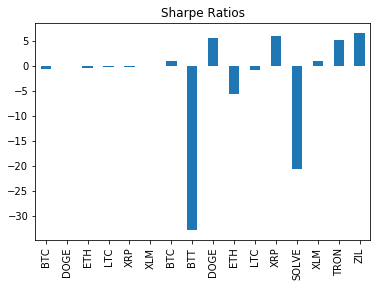

In [7]:
# Plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How many smart investments did Harold make compared to risky investments? How many did you make?

*Your answer here:*


### Which cryptos have been the smartest investment?

*Your answer here:*

### Calculate annualized std dev for each portfolio individually

In [8]:
# Calculate std dev for all investments for each portfolio
my_portfolio_std = my_portfolio.std()
harold_portfolio_std = harold_portfolio.std()
my_portfolio_std

BTC     3686.994854
DOGE       0.002247
ETH      271.134655
LTC       64.849415
XRP        0.408726
XLM        0.145318
dtype: float64

In [9]:
harold_portfolio_std

BTC      424.519506
BTT        0.000122
DOGE       0.000130
ETH       17.497852
LTC        5.431808
XRP        0.029508
SOLVE      0.045241
XLM        0.005639
TRON       0.001620
ZIL        0.001019
dtype: float64

### Calculate the sharpe ratios for each individual portfolio

In [10]:
# Calculate sharpe ratio
sharpe_ratios_my = (my_portfolio.mean() * 252) / (my_portfolio_std * np.sqrt(252))
sharpe_ratios_my

BTC     21.212561
DOGE    18.051385
ETH     16.403047
LTC     15.971078
XRP     14.302602
XLM     14.443100
dtype: float64

In [11]:
sharpe_ratios_harold = (harold_portfolio.mean() * 252) / (harold_portfolio_std * np.sqrt(252))
sharpe_ratios_harold

BTC      293.086914
BTT      128.691393
DOGE     378.953664
ETH      222.352037
LTC      273.395855
XRP      219.699810
SOLVE     95.588831
XLM      378.488614
TRON     281.038506
ZIL      290.248590
dtype: float64

### Average sharpe ratios for each portfolio and output to screen

In [13]:
# Averaging sharpe ratios
sharpe_ratios_my.mean()

16.730628733871935

In [12]:
sharpe_ratios_harold.mean()

256.1544214753238

### Compare Sharpe Ratios Averages

In [13]:
# Use comparison operator to determine if Harold's sharpe ratio avg is greater
if sharpe_ratios_my.mean() < sharpe_ratios_harold.mean():
    print('Harold\'s is greater')
else:
    print('Mine is greater')

Harold's is greater


### Which portfolio is the smartest investment, based off of risk to reward ratio?

*Your answer here:*

In [17]:
#My Protfolio